# Project 1 Final - Understanding Products & Outlets

This week, you will finalize your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.
  
To finalize this project, your task is to improve your model to predict sales and prepare a short (5-10 minute) presentation about your project.
  
 * Can you use other methods (ex. random forests) to improve your model to predict sales?
 * Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
 * Prepare a short (5-10 minute) presentation. Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.
 * Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
  
Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

### Current State of Modeling  
Currently, a K-Nearest Neighbors Regression model has been used to predict Item Outlet Sales for the dataset.  After running the model with various values of K, The best model performance was with K value of 45. The Mean Absolute Error is $790.  
  
The features of the data that provide the best model output are as follows:
 * Item MRP
 * Item Fat Content
 * Outlet Size
 * Outlet Location Type
 * Outlet Type
  

### Model Improvements
For this section, I will try a bagged trees regression and a random forest regression model to better predict Item Outlet Sales.

### Import Statements

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

# bagged trees and random forest classifiers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

# import for machine learning metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

### Load Data

In [2]:
# get file
filename = r"D:\CodingDojo\food-sales-predictions-kb\sales_dummies.csv"

# create dataframe
sales_dummies = pd.read_csv(filename)
sales_dummies.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,Type_Household,Type_Meat,Type_Others,Type_Seafood,Type_Snack Foods,Type_Soft Drinks,Type_Starchy Foods,Outlet_Size_Label,Outlet_Location_Label,Outlet_Type_Label
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,0,0,0,0,0,0,0,2,1,3
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,1,0,2,2,1
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,1,0,0,0,0,0,2,1,3
3,NCD19,8.930,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,1,0,0,0,0,0,0,0,2,3
4,FDP36,10.395,0.000000,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,...,0,0,0,0,0,0,0,2,2,1


In [3]:
# view dataframe information
sales_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Item_Identifier             6109 non-null   object 
 1   Item_Weight                 6109 non-null   float64
 2   Item_Visibility             6109 non-null   float64
 3   Item_MRP                    6109 non-null   float64
 4   Outlet_Identifier           6109 non-null   object 
 5   Outlet_Establishment_Year   6109 non-null   int64  
 6   Outlet_Size                 6109 non-null   object 
 7   Outlet_Location_Type        6109 non-null   object 
 8   Outlet_Type                 6109 non-null   object 
 9   Item_Outlet_Sales           6109 non-null   float64
 10  Fat_Regular                 6109 non-null   int64  
 11  Type_Breads                 6109 non-null   int64  
 12  Type_Breakfast              6109 non-null   int64  
 13  Type_Canned                 6109 

### Feature Matrix and Target Vector

In [4]:
# feature matrix
X = sales_dummies.iloc[:,[1,2,3,10] + list(range(11,29))]

# target vector
y = sales_dummies.loc[:,'Item_Outlet_Sales'].values

# check array shapes
X.shape, y.shape

((6109, 22), (6109,))

In [5]:
# split feature matrix into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### Bagged Trees Model

In [6]:
# run BaggingRegressor with range of n_estimators from 10 to 300
# make dataframe of results
# code inspired from 
# https://datasciencewithsan.com/knn/

# list to catch model results
bag_results = []

# for loop
for n_est in ([1,10] + list(range(20,301,10))):
    
    # instantiate regressor model
    bag_reg = BaggingRegressor(n_estimators= n_est,
                            random_state=3,
                            oob_score=True)
    
    # fit training data
    bag_reg.fit(X_train, y_train)
    
    # capture test scores
    test_score = bag_reg.score(X_test, y_test)
    
    # capture training scores
    train_score = bag_reg.score(X_train, y_train)
    
    # predicted sales
    y_pred = bag_reg.predict(X_test)
    
    # Mean of Absolute Error
    MAE = mae(y_test, y_pred)
    
    # Mean of Square of Errors
    MSE = mse(y_test, y_pred)
    
    # Root of Mean of Square Errors
    RMSE = MSE**0.5
    
    # capture results into list of tuples
    bag_results.append((n_est, train_score, test_score, MAE, MSE, RMSE))

# create dataframe of results
df_bag = pd.DataFrame(bag_results, 
                            columns=['Number Estimators','Train Score',
                                     'Test Score','MAE','MSE','RMSE'])

# sort dataframe by MAE
df_bag.sort_values(by='MAE', inplace=True)

D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_bagging.py:1066: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [9]:
df_bag

,Number Estimators,Train Score,Test Score,MAE,MSE,RMSE
29,290,0.935511,0.564016,800.873896,1.234109e+06,1110.904783
18,180,0.934819,0.563657,801.018825,1.235125e+06,1111.361782
24,240,0.935353,0.563928,801.055776,1.234359e+06,1111.017222
17,170,0.934816,0.563319,801.159832,1.236083e+06,1111.792672
19,190,0.935070,0.563492,801.188514,1.235593e+06,1111.572348
30,300,0.935600,0.564194,801.263951,1.233606e+06,1110.677961
25,250,0.935435,0.563807,801.329017,1.234701e+06,1111.170957
26,260,0.935371,0.563907,801.344631,1.234419e+06,1111.044311
27,270,0.935515,0.563516,801.377848,1.235526e+06,1111.542188
28,280,0.935482,0.563576,801.423009,1.235355e+06,1111.465263


### Feature Importance

In [7]:
# find feature importance
# this code is taken from stack overflow
# https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn/44334701#44334701
# provided by Mikhail Korobov

feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_reg.estimators_
], axis=0)

# find feature importance magnitude
# this code is taken from stack overflow
# https://stackoverflow.com/questions/54519113/feature-importance-in-logistic-regression-with-bagging-classifier
# provided by gorjan

coeff_magnitude = np.std(X_train, 0) * feature_importances

In [14]:
# view feature importance magnitudes
coeff_magnitude.sort_values(ascending=False)

Item_MRP                      28.587845
Item_Weight                    0.397678
Outlet_Type_Label              0.252015
Outlet_Location_Label          0.009165
Outlet_Size_Label              0.008448
Item_Visibility                0.005162
Fat_Regular                    0.004536
Type_Snack Foods               0.003045
Type_Fruits and Vegetables     0.002905
Type_Household                 0.001996
Type_Dairy                     0.001652
Type_Frozen Foods              0.001625
Type_Canned                    0.001462
Type_Soft Drinks               0.001041
Type_Health and Hygiene        0.001025
Type_Meat                      0.000904
Type_Breads                    0.000593
Type_Hard Drinks               0.000459
Type_Starchy Foods             0.000432
Type_Breakfast                 0.000334
Type_Others                    0.000283
Type_Seafood                   0.000126
dtype: float64

Text(0.5, 0, 'feature magnitude')

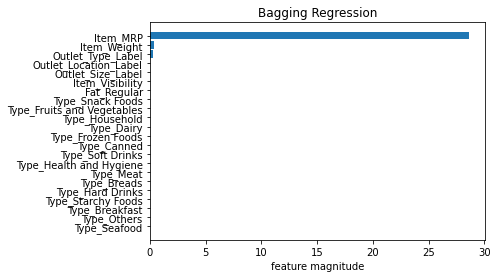

In [12]:
# visualize the feature importance magnitudes
# this code was inspired from
# https://mljar.com/blog/feature-importance-in-random-forest/
# provided by Piotr Płoński

sort_index = coeff_magnitude.argsort()
plt.barh(X_train.columns[sort_index], coeff_magnitude[sort_index]);
plt.title('Bagging Regression')
plt.xlabel('feature magnitude');

### Random Forests Model

In [15]:
# run RandomForestsRegressor with range of n_estimators from 10 to 300
# make dataframe of results

# list to catch model results
rf_results = []

# for loop
for n_est in ([1,10] + list(range(20,301,10))):
    
    # instantiate regressor model
    rf_reg = RandomForestRegressor(n_estimators= n_est,
                            random_state=0,
                            oob_score=True)
    
    # fit training data
    rf_reg.fit(X_train, y_train)
    
    # capture test scores
    test_score = rf_reg.score(X_test, y_test)
    
    # capture training scores
    train_score = rf_reg.score(X_train, y_train)
    
    # predicted sales
    y_pred = rf_reg.predict(X_test)
    
    # Mean of Absolute Error
    MAE = mae(y_test, y_pred)
    
    # Mean of Square of Errors
    MSE = mse(y_test, y_pred)
    
    # Root of Mean of Square Errors
    RMSE = MSE**0.5
    
    # capture results into list of tuples
    rf_results.append((n_est, train_score, test_score, MAE, MSE, RMSE))

# create dataframe of results
df_rf = pd.DataFrame(rf_results, 
                            columns=['Number Estimators','Train Score',
                                     'Test Score','MAE','MSE','RMSE'])

# sort dataframe by MAE
df_rf.sort_values(by='MAE', inplace=True)

D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\envs\datsci\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [16]:
df_rf

,Number Estimators,Train Score,Test Score,MAE,MSE,RMSE
5,50,0.930811,0.560406,802.279258,1.244328e+06,1115.494701
14,140,0.934245,0.561093,802.780722,1.242385e+06,1114.623180
22,220,0.935131,0.562827,803.052392,1.237475e+06,1112.418617
15,150,0.934357,0.562031,803.138627,1.239729e+06,1113.431384
21,210,0.935127,0.562200,803.417080,1.239249e+06,1113.215633
23,230,0.935136,0.561957,803.565241,1.239938e+06,1113.525031
6,60,0.931353,0.559833,803.600059,1.245949e+06,1116.220858
13,130,0.934058,0.560271,803.707582,1.244710e+06,1115.665843
25,250,0.935171,0.561946,803.751572,1.239968e+06,1113.538636
18,180,0.934766,0.561874,803.760810,1.240172e+06,1113.630051


### Feature Importance

In [18]:
# feature importances
rf_feature_importances = rf_reg.feature_importances_

# find feature importance magnitude
rf_magnitude = np.std(X_train, 0) * rf_feature_importances

In [20]:
# view feature importance magnitudes
rf_magnitude.sort_values(ascending=False)

Item_MRP                      28.683836
Item_Weight                    0.399742
Outlet_Type_Label              0.250758
Outlet_Location_Label          0.009062
Outlet_Size_Label              0.008484
Item_Visibility                0.005129
Fat_Regular                    0.004469
Type_Snack Foods               0.003020
Type_Fruits and Vegetables     0.002869
Type_Household                 0.002057
Type_Dairy                     0.001714
Type_Frozen Foods              0.001637
Type_Canned                    0.001441
Type_Soft Drinks               0.001009
Type_Health and Hygiene        0.001004
Type_Meat                      0.000904
Type_Breads                    0.000591
Type_Hard Drinks               0.000475
Type_Starchy Foods             0.000424
Type_Breakfast                 0.000350
Type_Others                    0.000273
Type_Seafood                   0.000132
dtype: float64

Text(0.5, 0, 'feature magnitude')

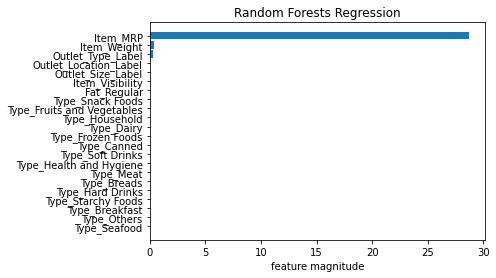

In [22]:
# visualize the feature importance magnitudes

sort_index = rf_magnitude.argsort()
plt.barh(X_train.columns[sort_index], rf_magnitude[sort_index]);
plt.title('Random Forests Regression')
plt.xlabel('feature magnitude');